# Creating a subpopulation with migration

For a simple population `M` is zero. It is non-zero only if this is a subpopulation within a larger metapopulation as described elsewhere. `M` gives the number of hosts per generation that enter the subpopulation from the metapopulation, which must be less than or equal to `N`.

The first step in using `coalestr` is to specify the history of transmission parameters of the parasite population that we want to simulate. The simplest way to format the transmission history is as a list of lists like this:

`my_history = [[duration, N, Q, X, M], [duration, N, Q, X, M]]`

Each inner list gives the transmission parameters for a period of population history.  The first inner list describes the first period, the second inner list describes the second period, and so on. Any number of periods are allowed, from 1 upwards.   
  
Each period of population history is described by five variables:

* `duration` - duration in generations
* `N` - effective number of hosts $N_h$
* `Q` - quantum of transmission $Q$
* `X` - crossing rate of transmission chains $\chi$
* `M` - migration rate from a metapopulation $N_m$.  

For a simple population `M` is zero. It is non-zero only if this is a subpopulation within a larger metapopulation [as described elsewhere](create_subpopulation.ipynb). `M` gives the number of hosts per generation that enter the subpopulation from the metapopulation, which must be less than or equal to `N`.

We create a population like this:

`my_population = coalestr.Population(my_history)`

This creates an instance of the `Population` class called `my_population` with the given set of transmission parameters.

In [1]:
import coalestr as cs
import matplotlib.pyplot as plt

In [ ]:
!pip install coalestr
from coalestr import cs

In [2]:
# We specify a history of transmission parameters
# with the format [duration, N, Q, X, M]
# in this case there are two periods each of 1000 generations

my_history = [[1000, 100, 5, 1, 0], [1000, 30, 10, 0, 0]]

# We use the history to create an instance of the Population class:

my_population = cs.Population(my_history)

* Rates of mutation and recombination

# Population attributes and methods

* Visualising the transmission history
* Rates of mutation and recombination

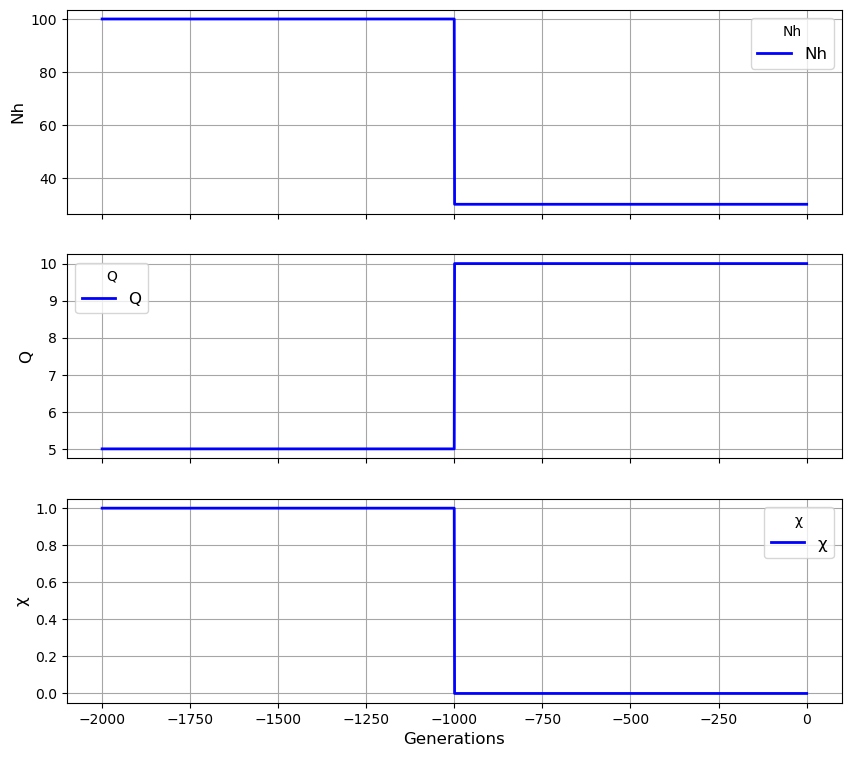

In [3]:
# We can visualise the transmission history like this:

my_population.plot_history()

Each population has a set of attributes such as rates of mutation and recombination.  These are given the following default values when creating a population but they can be modified at any stage.

* mu = 1.1e-8 (single nucleotide substitution rate)
* r = 7.4e-4 (locus scaled recombination rate per kb)
* v = 9e-5 (locus scaled mutation rate per kb)
* locus_kb = 27 (length of haplotype locus in kb)
* phi_seed = 0.2 (initialise effective recombination parameter $\phi$)

In [4]:
# What is the single nucleotide substition rate?

my_population.mu

1.1e-08

In [5]:
# What is the locus scaled recombination rate?

my_population.r

0.00074

In [6]:
# Show all the population settings

my_population.show_settings()

mu 1.100e-08, 
r 7.400e-04, 
v 9.000e-05, 
locus_kb 27.00
unit_length 13.50, 
chromosome_length 100, 
minimum_length 2


In [7]:
# We can change the mutation and recombination rates

my_population.mu = 5e-07
my_population.r = 6.3e-03

# Check the new values

my_population.show_settings()

mu 5.000e-07, 
r 6.300e-03, 
v 9.000e-05, 
locus_kb 27.00
unit_length 13.50, 
chromosome_length 100, 
minimum_length 2


In [8]:
# We can restore the default settings

my_population.restore_settings()
my_population.show_settings()

mu 1.100e-08, 
r 7.400e-04, 
v 9.000e-05, 
locus_kb 27.00
unit_length 13.50, 
chromosome_length 100, 
minimum_length 2


**Formatting the population history as an array**

In [ ]:
N = 300       # Effective number of hosts
Q = 5        # Quantum of transmission
X = 0.5      # Crossing rate of transmission chains
duration = 50000

history = [[duration, N, Q, X, 0]]
my_village = cs.Population(history)
my_village.get_coalescent(show = True)

In [ ]:
b_separated = my_village.beho_lineage[:, 0]
b_cotransmitted = my_village.beho_lineage[:, 1]
b_coalesced = my_village.beho_lineage[:, 2]

w_separated = my_village.wiho_lineage[:, 0]
w_cotransmitted = my_village.wiho_lineage[:, 1]
w_coalesced = my_village.wiho_lineage[:, 2]

In [ ]:
# in this figure the time axis has a log scale
# .. which requires that we offset the axis by 1
# .. so we pretend that alleles are sampled at bt = 1

timescale = range(1, my_village.t_his + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), sharex = True, sharey = True)

ax1.plot(timescale, b_separated, marker='', color='blue', linewidth = 2, label="Separated")
ax1.plot(timescale, b_cotransmitted, marker='', color='green', linewidth = 2, label="Cotransmitted")
ax1.plot(timescale, b_coalesced, marker='', color='red', linewidth = 2, label="Coalesced")

ax2.plot(timescale, w_separated, marker='', color='blue', linewidth = 2, label="Separated")
ax2.plot(timescale, w_cotransmitted, marker='', color='green', linewidth = 2, label="Cotransmitted")
ax2.plot(timescale, w_coalesced, marker='', color='red', linewidth = 2, label="Coalesced")

ax1.legend(title="BETWEEN-HOST",frameon=True, fontsize=12)
ax2.legend(title="WITHIN-HOST",frameon=True, fontsize=12)
ax1.set_xlabel("Generations before sample (offset +1)", fontsize=12)
ax2.set_xlabel("Generations before sample (offset +1)", fontsize=12)
ax1.set_ylabel("Probability", fontsize=12)
ax1.set_xscale('log',base=10)
ax1.set_xlim(1,my_village.t_his)
ax1.grid(visible=True, which='both', color='0.65', linestyle='-')
ax2.grid(visible=True, which='both', color='0.65', linestyle='-')

plt.show()

In [ ]:
history_1 = [[10000, 100, 1, 0, 0]]
village_1 = cs.Population(history_1)
village_1.get_coalescent(show = True)

In [ ]:
history_2 = [[10000, 100, 2, 0.5, 0]]
village_2 = cs.Population(history_2)
village_2.get_coalescent(show = True)

In [ ]:
history_3 = [[10000, 100, 10, 1, 0]]
village_3 = cs.Population(history_3)
village_3.get_coalescent(show = True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharex = True)

for example in [village_1, village_2, village_3]:
    
    N = example.parameters[0,0]
    Q = example.parameters[0,1]
    X = example.parameters[0,2]
    
    timescale = range(1, example.t_his)
    beho_coalescent = example.coalescent[0, 1:, 0]
    wiho_coalescent = example.coalescent[0, 1:, 1]

    ax1.plot(timescale, beho_coalescent, marker='', linewidth=2, label=
        "N {0:.0f}, Q {1:.0f}, \u03C7 {2:.1f}".format(N, Q, X))
    
    ax2.plot(timescale, wiho_coalescent, marker='', linewidth=2, label=
        "N {0:.0f}, Q {1:.0f}, \u03C7 {2:.1f}".format(N, Q, X))
    
ax1.set_title("Between-host", position=(0.8, 0.3), fontsize=14)
ax2.set_title("Within-host", position=(0.8, 0.3), fontsize=14)
ax1.set_xlabel("Time to coalescence", fontsize=12)
ax2.set_xlabel("Time to coalescence", fontsize=12)
ax1.set_ylabel("Probability", fontsize=12)
ax1.set_xscale('log',base=10)
ax1.legend(frameon=False, fontsize=12)
ax2.legend(frameon=False, fontsize=12)

plt.show()

In [ ]:
view_past_generations = 5

print("Sample two alleles from different hosts\n")
print("Generations    -------Probability distribution------")
print("back in time   Separated   Cotransmitted   Coalesced")

for i in range(view_past_generations + 1):
    separated = my_village.beho_lineage[i,0]
    cotransmitted = my_village.beho_lineage[i,1]
    coalesced = my_village.beho_lineage[i,2]
    
    print("{0:6d}{1:16.2f}{2:13.2f}{3:14.2f}".format(
        i,
        separated,
        cotransmitted,
        coalesced ))

In [ ]:
print("Sample two alleles from the same host\n")
print("Generations    -------Probability distribution------")
print("back in time   Separated   Cotransmitted   Coalesced")

for i in range(view_past_generations + 1):
    separated = my_village.wiho_lineage[i,0]
    cotransmitted = my_village.wiho_lineage[i,1]
    coalesced = my_village.wiho_lineage[i,2]
    
    print("{0:6d}{1:16.2f}{2:13.2f}{3:14.2f}".format(
        i,
        separated,
        cotransmitted,
        coalesced ))